# Using Python for Research Homework: Week 5, Case Study Part 1

The [movie dataset on which this case study is based](https://www.kaggle.com/tmdb/tmdb-movie-metadata) is a database of 5000 movies catalogued by [The Movie Database (TMDb)](https://www.themoviedb.org/?language=en). The information available about each movie is its budget, revenue, rating, actors and actresses, etc. In this case study, we will use this dataset to determine whether any information about a movie can predict the total revenue of a movie. We will also attempt to predict whether a movie's revenue will exceed its budget.

In Part 1, we will inspect, clean, and transform the data.

### Exercise 1

First, we will import several libraries. `scikit-learn` (**sklearn**) contains helpful statistical models, and we'll use the `matplotlib.pyplot` library for visualizations. Of course, we will use `numpy` and `pandas` for data manipulation throughout.

#### Instructions 

- Read and execute the given code.
- Call `df.head()` to take a look at the data.

In [133]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

df = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@movie_data.csv", index_col=0)

# Enter code here.


In [134]:
#budget=presupuesto
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp, Orlando Bloom, Keira Knightley, S..."
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,880674609,148.0,"Français, English, Español, Italiano, Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra..."
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"Christian Bale, Michael Caine, Gary Oldman, An..."
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"Taylor Kitsch, Lynn Collins, Samantha Morton, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"Action, Crime, Thriller",NaN,9367,"united states–mexico barrier, legs, arms, pape...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,Columbia Pictures,"Mexico, United States of America",1992-09-04,2040920,81.0,Español,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,"Carlos Gallardo, Jaime de Hoyos, Peter Marquar..."
4799,9000,"Comedy, Romance",NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,NaN,NaN,2011-12-26,0,85.0,NaN,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,"Edward Burns, Kerry Bishé, Marsha Dietlein, Ca..."
4800,0,"Comedy, Drama, Romance, TV Movie",http://www.hallmarkchannel.com/signedsealeddel...,231617,"date, love at first sight, narration, investig...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"Front Street Pictures, Muse Entertainment Ente...",United States of America,2013-10-13,0,120.0,English,Released,NaN,"Signed, Sealed, Delivered",7.0,6,231617,"Eric Mabius, Kristin Booth, Crystal Lowe, Geof..."
4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,NaN,"United States of America, China",2012-05-03,0,98.0,English,Re

### Exercise 2

In this exercise, we will define the regression and classification outcomes. Specifically, we will use the `revenue` column as the target for regression. For classification, we will construct an indicator of profitability for each movie.

#### Instructions 
- Create a new column in `df` called `profitable`, defined as 1 if the movie `revenue` is greater than the movie `budget`, and 0 otherwise.
- Next, define and store the outcomes we will use for regression and classification.
    - Define `regression_target` as the string `'revenue'`.
    - Define `classification_target` as the string `'profitable'`.

In [135]:
#[   f(x)       if condition    else g(x)   for     x in sequence]

# Enter code here.

df["profitable"]=[df.revenue[i]/df.revenue[i] if df.revenue[i] > df.budget[i] else df.revenue[i]-df.revenue[i] for i in range(len(df.revenue))]

#para comprobar, debo hayar una manera mas facil de hacer esto:
#newdf=pd.DataFrame()
#newdf["Profitable"]=df["Profitable"]
#newdf["revenue"]=df["revenue"]
#newdf["budget"]=df["budget"]
#newdf

In [136]:
regression_target ='revenue'
classification_target ='profitable'

In [137]:
#cuenta todas las columnas revisando un dato
df[df.profitable==1].count()

budget                  2585
genres                  2585
homepage                1127
id                      2585
keywords                2531
original_language       2585
original_title          2585
overview                2585
popularity              2585
production_companies    2557
production_countries    2575
release_date            2585
revenue                 2585
runtime                 2585
spoken_languages        2577
status                  2585
tagline                 2413
title                   2585
vote_average            2585
vote_count              2585
movie_id                2585
cast                    2583
profitable              2585
dtype: int64

### Exercise 3

For simplicity, we will proceed by analyzing only the rows without any missing data. In this exercise, we will remove rows with any infinite or missing values.

#### Instructions 

- Use `df.replace()` to replace any cells with type `np.inf` or `-np.inf` with `np.nan`.
- Drop all rows with any `np.nan` values in that row using `df.dropna()`. Do any further arguments need to be specified in this function to remove rows with any such values?

In [138]:
np.inf

inf

In [139]:
# No hay diferencia...
df=df.replace(to_replace=[np.inf,-np.inf],value=np.nan)
df=df.dropna(how="any")

### Exercise 4

Many of the variables in our dataframe contain the names of genre, actors/actresses, and keywords. Let's add indicator columns for each genre.

#### Instructions 

- Determine all the genres in the genre column. Make sure to use the `strip()` function on each genre to remove trailing characters.
- Next, include each listed genre as a new column in the dataframe. Each element of these genre columns should be 1 if the movie belongs to that particular genre, and 0 otherwise. Keep in mind, a movie may belong to several genres at once.
- Call `df[genres].head()` to view your results.

In [140]:
#Probando con loop normal
generies=[]
for i in df["genres"]:
  splited=i.split(",")
  stripteds=[]
  for j in splited:
    stripted=j.strip()
    stripteds.append(stripted)
  generies.append(stripteds)
generies

#Pasandolo a list comprehetion

#f(b) for b in a list

generies2=[          [b.strip() for b in a.split(",")]          for a in df["genres"] ]

genereses=[]
for a in generies2:
  for b in a:
    genereses.append(b)
   



In [141]:
# Enter code here.
df["genres"]=[[b.strip() for b in a.split(",")] for a in df["genres"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [142]:
#add elemets from Lists in list

columns=[]
[columns.extend(el) for el in list(df["genres"])]
columns=list(set(columns))

len(columns)#[0] in df["genres"][0]

20

In [143]:
for gen in columns:
  df[gen]=[1 if gen in list(df["genres"])[i] else 0 for i in range(len(df["genres"]))]

In [144]:
df.loc()

In [145]:
#df.loc[0:,columns]

In [146]:
x = [["a","b"], ["c"]]

#The best I can come up with is as follows.

result = []
[ result.extend(el) for el in x] 

for el in result:
  print(el)


a
b
c


### Exercise 5

Some variables in the dataset are already numeric and perhaps useful for regression and classification. In this exercise, we will store the names of these variables for future use. We will also take a look at some of the continuous variables and outcomes by plotting each pair in a scatter plot. Finally, we will evaluate the skew of each variable.

#### Instructions 
- Call `plt.show()` to observe the plot below.
    - Which of the covariates and/or outcomes are correlated with each other?
- Call `skew()` on the columns `outcomes_and_continuous_covariates` in df.
    - Is the skew above 1 for any of these variables?

In [147]:
#muestra de las columnas especificas
#df[plotting_variables]
#df[["genres"]+columns]

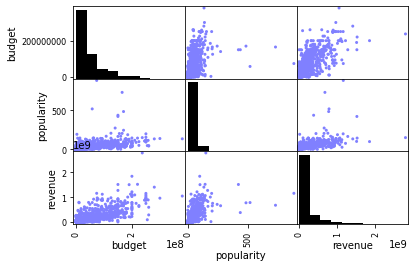

budget          1.754872
popularity      7.968139
runtime         1.059804
vote_count      2.461041
vote_average   -1.080038
revenue         3.084680
profitable     -1.081030
dtype: float64

In [148]:
continuous_covariates = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average']
outcomes_and_continuous_covariates = continuous_covariates + [regression_target, classification_target]
plotting_variables = ['budget', 'popularity', regression_target]

axes = pd.plotting.scatter_matrix(df[plotting_variables], alpha=1, \
       color=(0,0,0), hist_kwds={"color":(0,0,0)}, facecolor=(0.5,0.5,1))
# show the plot.
plt.show()

df[outcomes_and_continuous_covariates].skew()


### Exercise 6

It appears that the variables `budget`, `popularity`, `runtime`, `vote_count`, and `revenue` are all right-skewed. In this exercise, we will transform these variables to eliminate this skewness. Specifically, we will use the `np.log10()` method. Because some of these variable values are exactly 0, we will add a small positive value to each to ensure it is defined; this is necessary because log(0) is negative infinity.

#### Instructions 
- For each above-mentioned variable in `df`, transform value `x` into `np.log10(1+x)`.

In [110]:
df_git=pd.DataFrame(df)
for data_git in ['budget', 'popularity', 'runtime', 'vote_count', 'revenue']:
    df_git[data_git] = df_git[data_git].apply(lambda x: np.log10(1+x))

df_git[outcomes_and_continuous_covariates].skew()

budget         -2.816990
popularity     -0.431543
runtime         0.530489
vote_count     -0.677632
vote_average   -1.080038
revenue        -2.177372
profitable     -1.081030
dtype: float64

In [131]:
#df

In [87]:
# Enter your code here.
skew_data=[a for a in outcomes_and_continuous_covariates if a not in  ["profitable","vote_average"]]
#dk=df[skew_data]
#for col in skew_data:
#  for data in dk[col]:
#    dk.replace(to_replace=data, value=np.log10(1+data))
#["profitable","vote_average"]
#df[outcomes_and_continuous_covariates]

In [155]:
df[skew_data]=df[skew_data].apply(lambda x: np.log10(1+x))
df[outcomes_and_continuous_covariates].skew()


budget         -3.280703
popularity     -1.656970
runtime         0.429685
vote_count     -2.665132
vote_average   -1.080038
revenue        -2.558738
profitable     -1.081030
dtype: float64

### Exercise 7

Let's now save our dataset. 

#### Instructions 
- Use `to_csv()` to save the `df` object as `movies_clean.csv`.

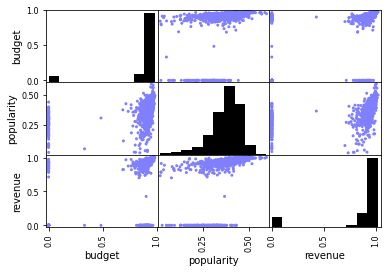

budget         -3.205872
popularity     -1.166747
runtime         0.461748
vote_count     -1.667956
vote_average   -1.080038
revenue        -2.499342
profitable     -1.081030
dtype: float64

In [89]:
continuous_covariates = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average']
outcomes_and_continuous_covariates = continuous_covariates + [regression_target, classification_target]
plotting_variables = ['budget', 'popularity', regression_target]

axes = pd.plotting.scatter_matrix(df[plotting_variables], alpha=1, \
       color=(0,0,0), hist_kwds={"color":(0,0,0)}, facecolor=(0.5,0.5,1))
# show the plot.
plt.show()

df[outcomes_and_continuous_covariates].skew()

In [90]:
# Enter your code here
df.to_csv("movies_clean.csv")
sum(df.profitable==1)

1037